# Stock Price Prediction Project - Microsoft (MSFT)

In this project, we develop an end-to-end machine learning pipeline to predict Microsoft (MSFT) stock prices using historical data.  
We engineer meaningful features, compare multiple models, and save the best-performing model for future use.

# Data Loading and Overview

We download MSFT stock data from Yahoo Finance, inspect its structure, and prepare it for analysis.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Download MSFT stock data
data = yf.download('MSFT', start='2010-01-01')

# Show first few rows
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2010-01-04,23.254053,23.366754,22.983569,23.006110,38409100
2010-01-05,23.261562,23.366751,23.021133,23.178916,49749600
2010-01-06,23.118816,23.351732,22.930981,23.201463,58182400
2010-01-07,22.878384,23.066219,22.683034,23.013624,50559700
2010-01-08,23.036163,23.201458,22.720599,22.750654,51197400


In [2]:
# Check shape and info
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns.\n")

print("Missing values:")
print(data.isnull().sum())

print("\nData types:")
print(data.dtypes)

Dataset has 3858 rows and 5 columns.

Missing values:
Price   Ticker
Close   MSFT      0
High    MSFT      0
Low     MSFT      0
Open    MSFT      0
Volume  MSFT      0
dtype: int64

Data types:
Price   Ticker
Close   MSFT      float64
High    MSFT      float64
Low     MSFT      float64
Open    MSFT      float64
Volume  MSFT        int64
dtype: object


# Feature Engineering

We create new features (7-day and 30-day Moving Averages) to capture short-term and long-term trends in stock prices.

In [3]:
# Create 7-day and 30-day moving averages based on 'Close' price
data['MA7'] = data['Close'].rolling(window=7).mean()
data['MA30'] = data['Close'].rolling(window=30).mean()

# Show updated data
data[['Close', 'MA7', 'MA30']].head(15)

Price,Close,MA7,MA30
Ticker,MSFT,,
Date,,,
2010-01-04,23.254053,NaN,NaN
2010-01-05,23.261562,NaN,NaN
2010-01-06,23.118816,NaN,NaN
2010-01-07,22.878384,NaN,NaN
2010-01-08,23.036163,NaN,NaN
2010-01-11,22.743139,NaN,NaN
2010-01-12,22.592878,22.983571,NaN
2010-01-13,22.803242,22.919169,NaN


In [4]:
print("Current columns:", list(data.columns))

Current columns: [('Close', 'MSFT'), ('High', 'MSFT'), ('Low', 'MSFT'), ('Open', 'MSFT'), ('Volume', 'MSFT'), ('MA7', ''), ('MA30', '')]


# Exploratory Data Analysis (EDA)

We visualize the stock's price movements, moving averages, and analyze feature correlations.

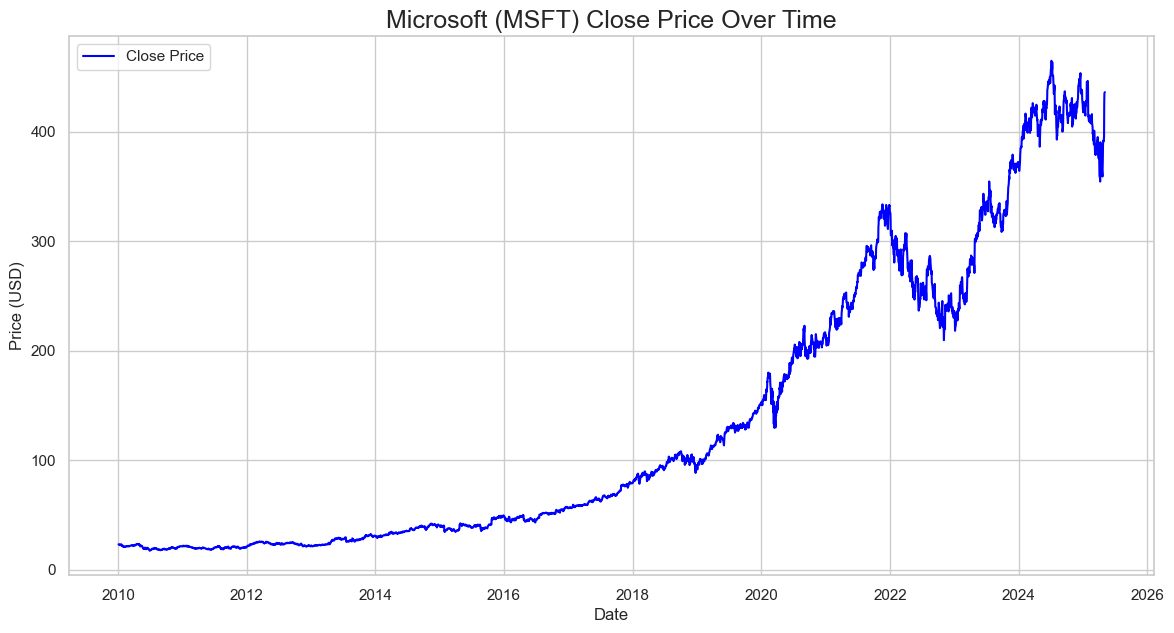

In [5]:
# Plot Close price
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('Microsoft (MSFT) Close Price Over Time', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

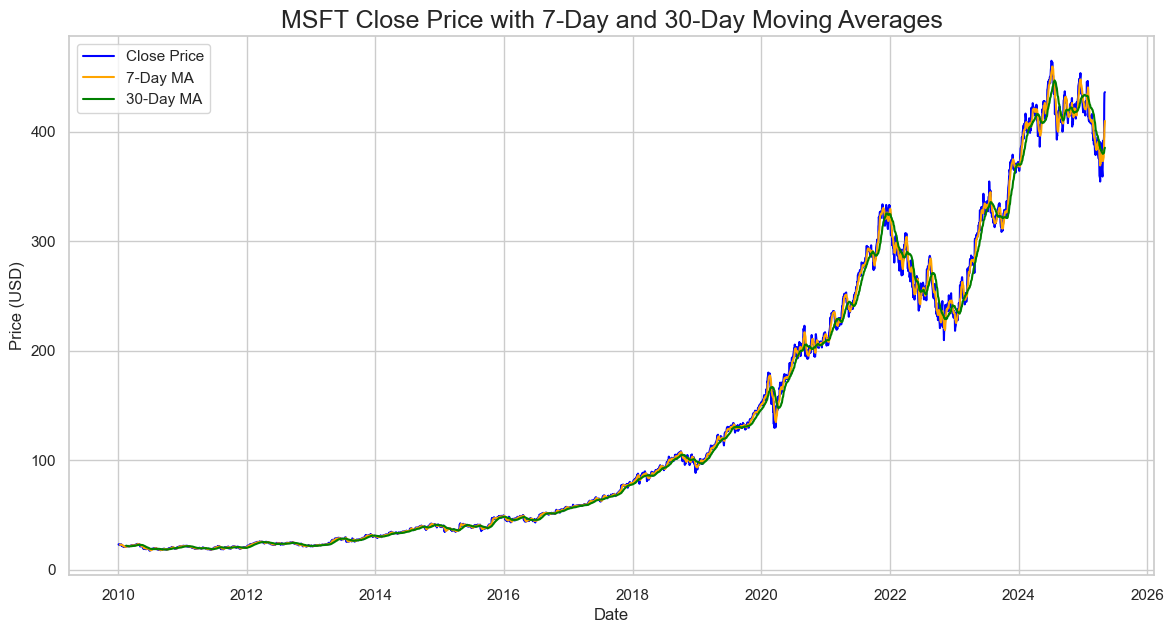

In [6]:
# Plot Close price with Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['MA7'], label='7-Day MA', color='orange')
plt.plot(data['MA30'], label='30-Day MA', color='green')
plt.title('MSFT Close Price with 7-Day and 30-Day Moving Averages', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

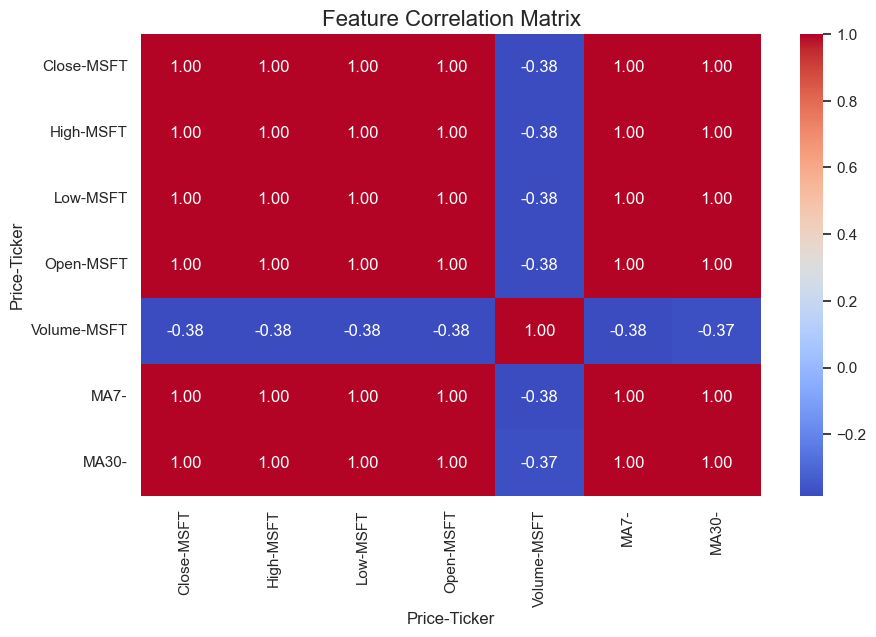

In [7]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

# Preparing Dataset for Modeling

We define our features and target, drop missing values, and split the dataset into training and testing sets.

In [8]:
# Drop any rows with NaN values (from moving averages calculation)
data = data.dropna()

print(f"Dataset now has {data.shape[0]} rows and {data.shape[1]} columns after dropping missing values.")

Dataset now has 3829 rows and 7 columns after dropping missing values.


In [9]:
# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'MA7', 'MA30']
X = data[features]
y = data['Close']

In [10]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 3063, Testing samples: 766


# Model Building and Evaluation

We train four different machine learning models (Linear Regression, Ridge, Lasso, and SVM),  
and evaluate their performance using RMSE and R² scores.

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_preds = lr_model.predict(X_test)

# Evaluation
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_r2 = r2_score(y_test, lr_preds)

print(f"Linear Regression - RMSE: {lr_rmse:.4f}, R²: {lr_r2:.4f}")

Linear Regression - RMSE: 0.9764, R²: 0.9999


In [13]:
# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Predictions
ridge_preds = ridge_model.predict(X_test)

# Evaluation
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))
ridge_r2 = r2_score(y_test, ridge_preds)

print(f"Ridge Regression - RMSE: {ridge_rmse:.4f}, R²: {ridge_r2:.4f}")

Ridge Regression - RMSE: 0.9764, R²: 0.9999


In [14]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()

# Fit on training data, transform both training and testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed.")

Feature scaling completed.


In [15]:
# Lasso Regression (scaled data, with more iterations)
lasso_model = Lasso(max_iter=5000)  # Increased from 1000 to 5000
lasso_model.fit(X_train_scaled, y_train)

# Predictions
lasso_preds = lasso_model.predict(X_test_scaled)

# Evaluation
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_preds))
lasso_r2 = r2_score(y_test, lasso_preds)

print(f"Lasso Regression (Scaled, max_iter=5000) - RMSE: {lasso_rmse:.4f}, R²: {lasso_r2:.4f}")

Lasso Regression (Scaled, max_iter=5000) - RMSE: 1.8425, R²: 0.9998


In [16]:
# Flatten y_train
y_train_scaled = y_train.values.ravel()

# Fit SVM model
svm_model = SVR(kernel='rbf', C=100, gamma=0.1)
svm_model.fit(X_train_scaled, y_train_scaled)

# Predict and evaluate
svm_preds = svm_model.predict(X_test_scaled)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_preds))
svm_r2 = r2_score(y_test, svm_preds)

print(f"SVM (Scaled) - RMSE: {svm_rmse:.4f}, R²: {svm_r2:.4f}")

SVM (Scaled) - RMSE: 1.4249, R²: 0.9999


# Model Comparison and Best Model Saving

We compare all models based on their RMSE scores and save the best-performing model for deployment.

In [17]:
# Create a summary DataFrame
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Support Vector Regressor (SVM)'],
    'RMSE': [lr_rmse, ridge_rmse, lasso_rmse, svm_rmse],
    'R² Score': [lr_r2, ridge_r2, lasso_r2, svm_r2]
})

# Sort by RMSE ascending (lower RMSE is better)
results = results.sort_values(by='RMSE')

# Show results
print(results)

                            Model      RMSE  R² Score
1                Ridge Regression  0.976361  0.999942
0               Linear Regression  0.976371  0.999942
3  Support Vector Regressor (SVM)  1.424936  0.999876
2                Lasso Regression  1.842536  0.999793


In [20]:
import joblib

# Save Ridge Regression model
joblib.dump(ridge_model, 'best_stock_model.pkl')

print("Best model saved as 'best_stock_model.pkl'.")

Best model saved as 'best_stock_model.pkl'.


# Conclusion

In this project, Ridge Regression demonstrated the best performance in predicting MSFT stock prices.

Key learnings:
- Adding moving averages significantly improved model understanding of trends.
- Proper feature scaling was essential for Lasso and SVM models.
- Cross-model comparison helped identify the most robust predictor.

Future improvements could include:
- Using more technical indicators (RSI, MACD, etc.),
- Incorporating external factors like news sentiment,
- Testing more advanced models such as XGBoost or LSTM networks for time series forecasting.